# Task 3 - Car Price Prediction

# Problem Statement    
    
    The price of a car depends on a lot of factors like the goodwill of the brand of the car, 
    features of the car, horsepower and the mileage it gives and many more. Car price prediction 
    is one of the major research areas in machine learning. So if you want to learn how to train 
    a car price prediction model then this project is for you.

# Approach : 
    The classical machine learning tasks like Data Exploration, Data Cleaning, 
    Feature Engineering, Model Building and Model Testing. Using Random Forest Regressor 
    learning algorithms that’s best fit for the above case.

# Procedure :
    Step 1 : Import Libraries and Dataset
    
    Step 2 : Data Pre-processing
            1. Data Type and conversion
            2. Removing Irrelevant Columns
            3. Identifying & Treatment Missing Value 
            4. Identifying & Treatment Outliers
            5. Descriptive Analysis
            6. Correlation
            
    Step 3 : Data Visualization
            
    Step 4 : Breaking Data into 2 Parts          
            
    Step 5 : Data Partition  
    
    Step 6 : Model Building

             Conclusion

# Step 1 :- Import Libraries and Dataset

In [1]:
################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\admin\Desktop\Machine Learning\Oasis Infobyte Internship\Task 3\CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Step 2 :- Data Pre-Processing 

1. Data Type and conversion
2. Removing Irrelevant Columns
3. Identifying & Treatment Missing Value 
4. Identifying & Treatment Outliers
5. Descriptive Analysis
6. Correlation

### 2.1 Data Type and Conversion

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

* All the columns are numerical.

### 2.2 Removing Irrelevent Columns

In [4]:
df = df.drop('car_ID', axis = 1)

### 2.3 Identifying and Treatment of Missing Values

In [5]:
# count the number of NaN values in each column
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

* No Missing values present in dataset

### 2.4 Identifying And Treatment of Outliers

<AxesSubplot:>

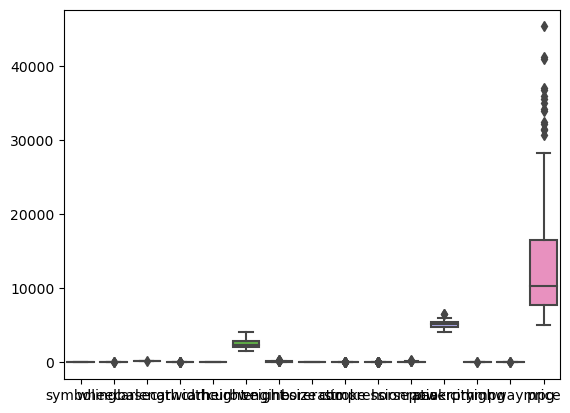

In [6]:
sns.boxplot(data = df)

* We will treat outliers using feature scaling after visualization

### 2.5 Descriptive Analysis

In [7]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
Correlation=df.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


<AxesSubplot:>

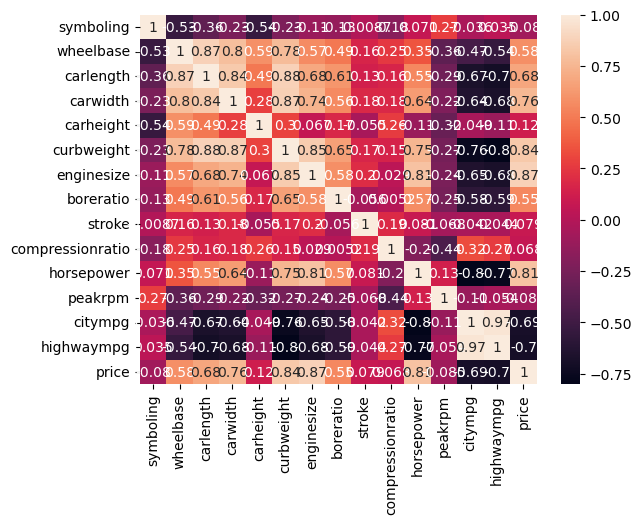

In [9]:
sns.heatmap(df.corr(),annot = True)

# Step 3 : Data Visualization 

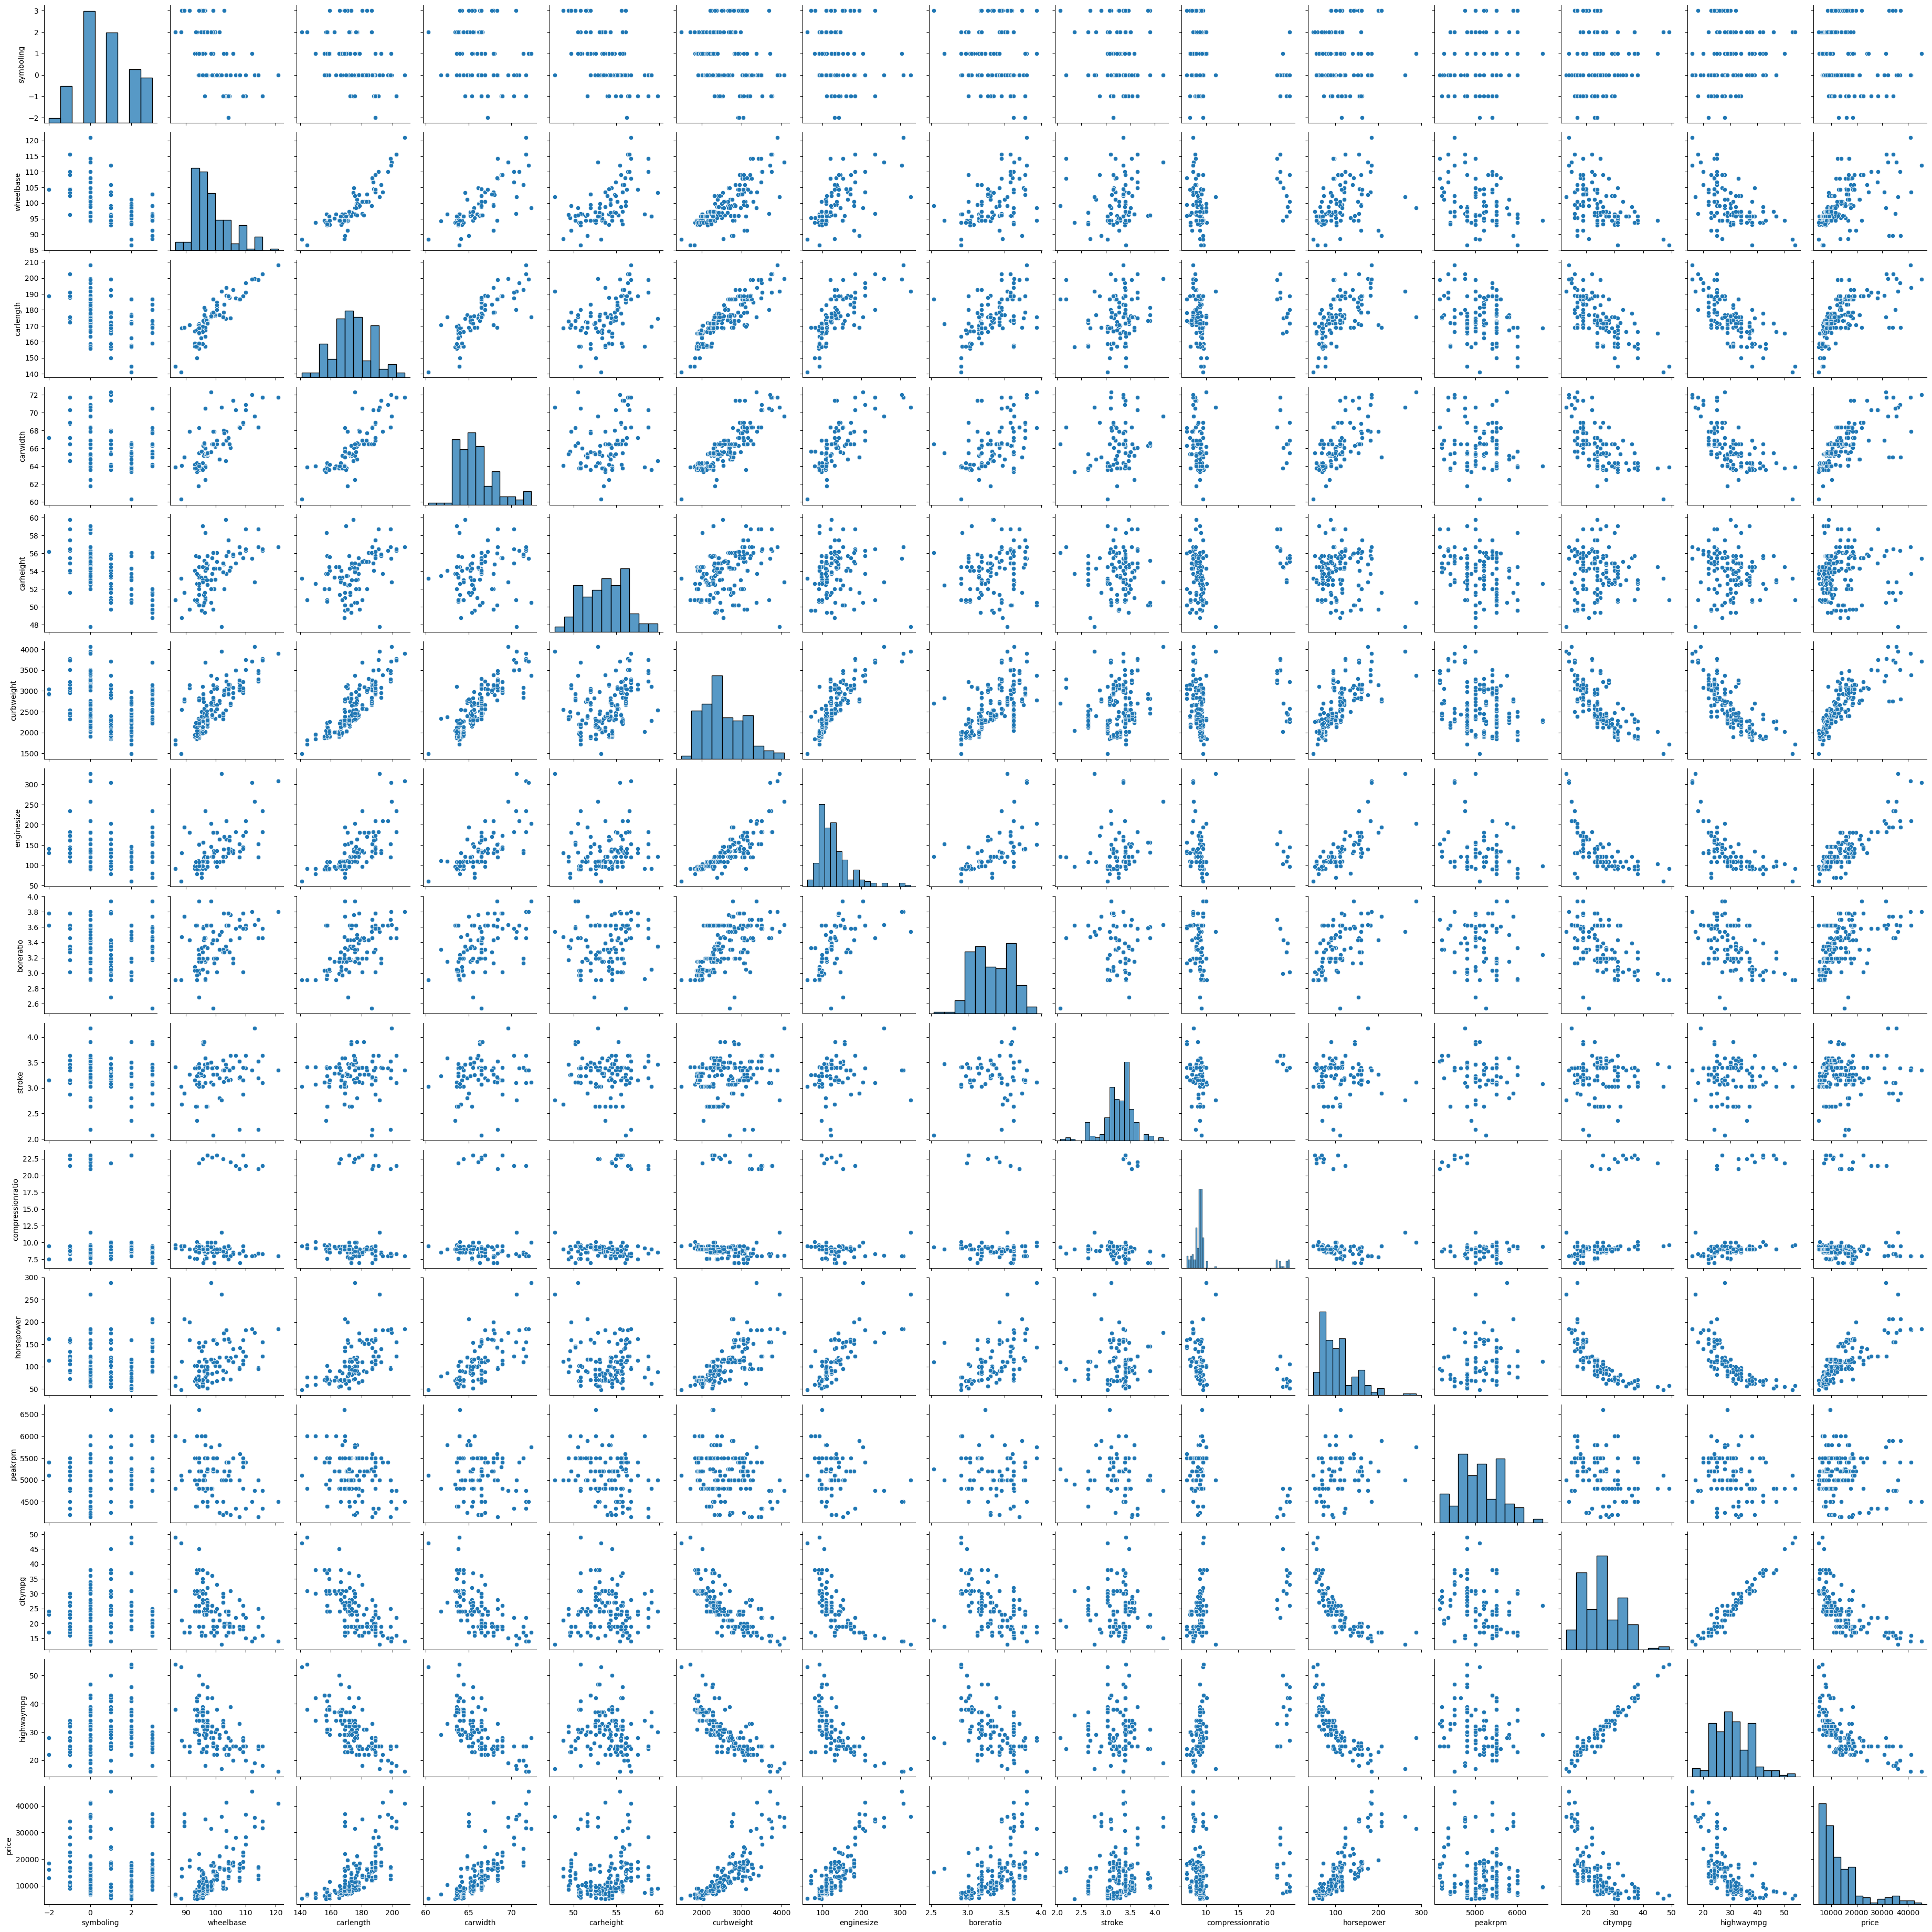

In [10]:
sns.pairplot(data = df)

# Step 4 : Breaking Dataset into 2 Parts

In [14]:
# Quantitative Variable (Numbers)
Quantitative_Variable = df[df.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0


In [15]:
# Qualitative Variable (Objects)
Qualitative_Variable = df[df.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi


In [16]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,2,1,0,1,0,2,0,0,2,5
1,3,1,0,1,0,2,0,0,2,5
2,1,1,0,1,2,2,0,5,3,5
3,4,1,0,0,3,1,0,3,2,5
4,5,1,0,0,3,0,0,3,1,5


In [17]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,5,3,5,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,1,0,0,3,1,0,3,2,5,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,1,0,0,3,0,0,3,1,5,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


# Step 5 : Data Partition 

In [18]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = Final_combined.drop('price', axis = 1)
Y = Final_combined[['price']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=5729)

# Step 6 : Model building 

### Hypothesis

* H0 :- There is no log linear relationship between Species and all independent Variable

Vs 

* H1 :- There is log linear relationship between Species and all independent Variable

Alpha = 0.05 (5%)

In [26]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
RF_Model.fit(X_train,y_train)
y_predict1=RF_Model.predict(X_train)
y_predict=RF_Model.predict(X_test)
r2_score(y_train,y_predict1)

C:\Users\admin\AppData\Local\Temp\ipykernel_13544\1094669321.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_Model.fit(X_train,y_train)


0.9875809714418359

In [27]:
r2_score(y_test,y_predict)

0.9401831609912211

# CONCLUSION

* Train Accuracy of Car Price model is 99%
* Test Accuracy of Car Price Model is 96.47%
* as outlier has no impact in case of Random forest Regressior we chose Random Forest Regressor
* Engine Size is best independent variable as it has 86% strong positive correlation with price.
* linear Regression fails because of Assumption and it has many error.
* In Future we can apply this model on Car price Prediction.